<a href="https://colab.research.google.com/github/lucaspn017/time_series_analysis/blob/main/ClimateTimeSeriesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size= '400px'> **Data characteristics.** </font>

> ## This dataset represents the climate timeseries datas for the `Indian capital called New Delhi`.


> ## It is a `tropical city`, which caracterize it as having a summer period between June and September.


> ## The dataset presents the following informations: `meantemp`, `humidity`, `wind_speed`, `meanpressure`.

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot  as plt
import kagglehub

<div align='center'><font size="30px">Basic Analysis </font></div>

# 1° Step: Data collection and cleaning.

In [ ]:
# Download latest version
path = kagglehub.dataset_download("sumanthvrao/daily-climate-time-series-data")

print("Path to dataset files:", path)
dataClimate = pd.read_csv(path + '/DailyDelhiClimateTrain.csv')

Using Colab cache for faster access to the 'daily-climate-time-series-data' dataset.
Path to dataset files: /kaggle/input/daily-climate-time-series-data


In [ ]:
dataClimatedf = pd.DataFrame(dataClimate)

print(dataClimatedf.isnull().sum())

print(dataClimatedf.duplicated().sum())

print(dataClimatedf.info())

dataClimatedf


# 2° Step: Data transformation and exploration.

## 1. It´s remarkable that the´re sazonality behavior in the following variables:

> **Average temperature:** In this case, the temperature `starts to rise around April`, `peaks in May`, and then decreases, as commonly occurs in the Indian summer.

> **Wind Speed:** Here, the wind speed `grows accondingly the summer begins`. That is, the increasing of temperature creates `low pressure areas`, what raises the wind speed.

> **Humidity:** It´s decreases in summer, because this region (New Delhi) `becames drier` in this climate period.

## 2. The average temperature that is most frequent is 30°C, what is tipically in a tropical country as India.

In [ ]:
#Let´s transformate the dtype of date column that is in object format.
dataClimatedf['date'] = pd.to_datetime(dataClimatedf['date'])

### Let´s verify the behavior of the four variables: `meantemp`, `humidity`, `wind_speed`, `meanpressure`, according the date.


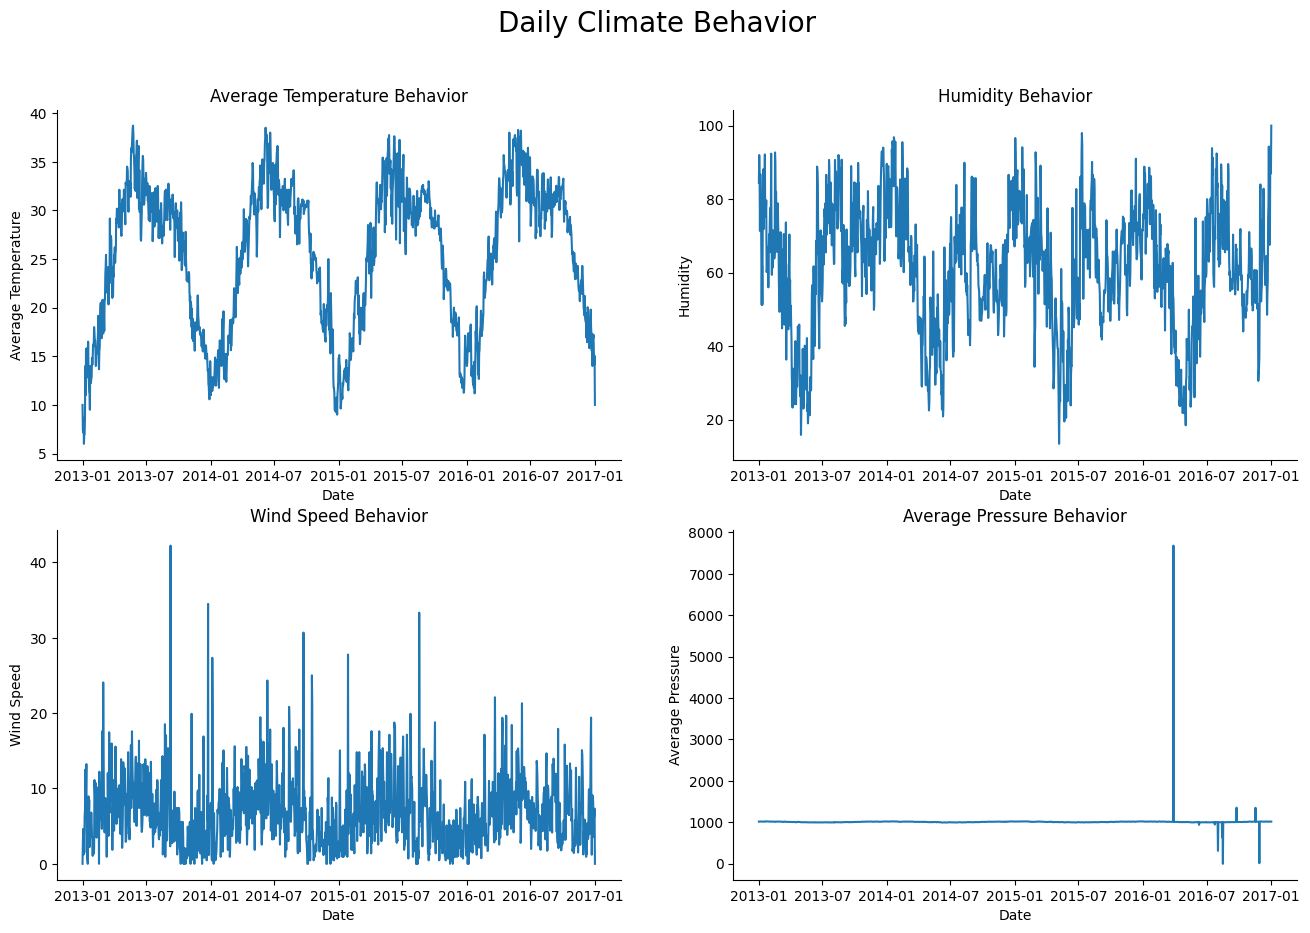

In [ ]:
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(16,10))

fig.suptitle('Daily Climate Behavior', fontsize=20)

ax[0,0] = sns.lineplot(data=dataClimatedf, x='date', y='meantemp', ax=ax[0,0])
ax[0,0].set_xlabel('Date')
ax[0,0].set_ylabel('Average Temperature')
ax[0,0].set_title('Average Temperature Behavior')

ax[0,1] = sns.lineplot(data= dataClimatedf, x='date', y='humidity', ax=ax[0,1])
ax[0,1].set_xlabel('Date')
ax[0,1].set_ylabel('Humidity')
ax[0,1].set_title('Humidity Behavior')

ax[1,0] = sns.lineplot(data= dataClimatedf, x='date', y='wind_speed', ax=ax[1,0])
ax[1,0].set_xlabel('Date')
ax[1,0].set_ylabel('Wind Speed')
ax[1,0].set_title('Wind Speed Behavior')

ax[1,1] = sns.lineplot(data= dataClimatedf, x='date', y='meanpressure', ax=ax[1,1])
ax[1,1].set_xlabel('Date')
ax[1,1].set_ylabel('Average Pressure')
ax[1,1].set_title('Average Pressure Behavior')

sns.despine()
plt.show()



### Now, just one period (2013), to examine the `sazonality` with more accuracy.

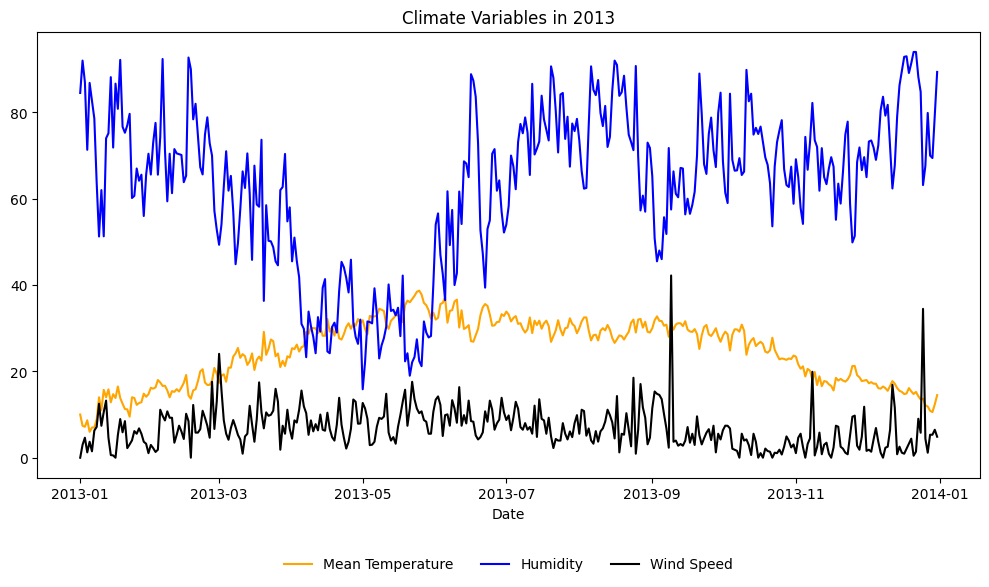

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

dados2013 = dataClimatedf[dataClimatedf['date'].dt.year == 2013]

sns.lineplot(data=dados2013, x='date', y='meantemp', color='orange', label='Mean Temperature', ax=ax)
sns.lineplot(data=dados2013, x='date', y='humidity', color='blue', label='Humidity', ax=ax)
sns.lineplot(data=dados2013, x='date', y='wind_speed', color='black', label='Wind Speed', ax=ax)

ax.set_ylabel('')
ax.set_xlabel('Date')
ax.set_title('Climate Variables in 2013')

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, frameon=False, labelcolor='black')

plt.tight_layout()
plt.show()

### Finally, let´s count how many times in which each variable range appears.

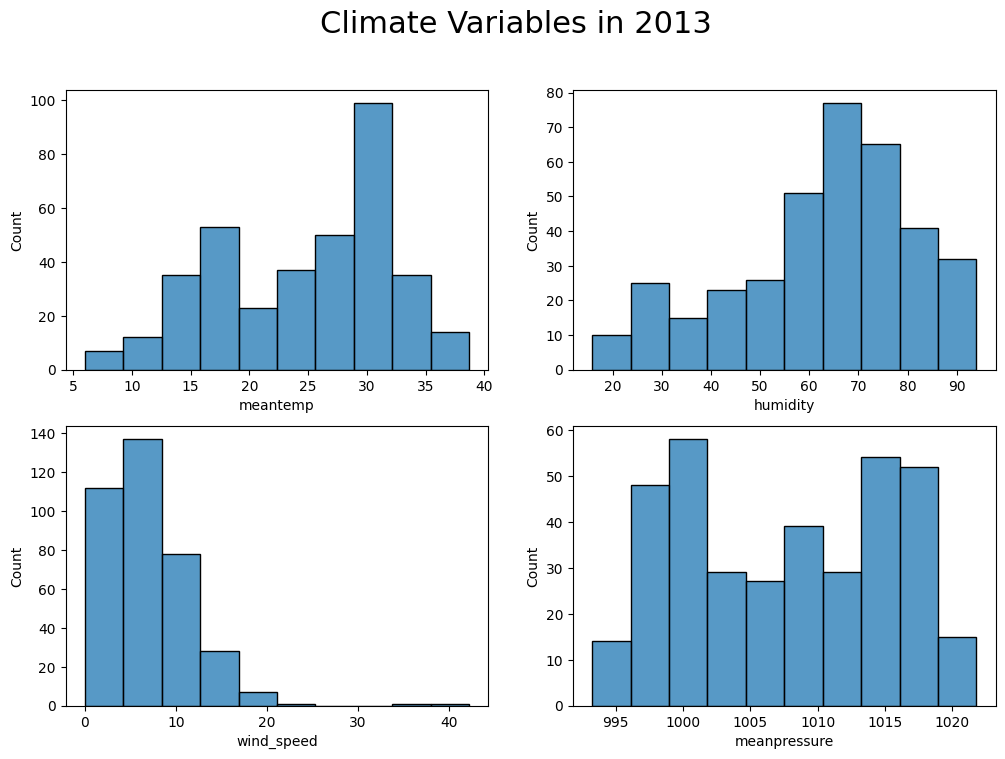

In [ ]:
fig, ax = plt.subplots(ncols=2,nrows=2, figsize=(12,8))

plt.suptitle('Climate Variables in 2013', fontsize=22)

sns.histplot(dados2013, x='meantemp', bins=10, ax=ax[0,0])
sns.histplot(dados2013, x='humidity', bins=10, ax=ax[0,1])
sns.histplot(dados2013, x='wind_speed', bins=10, ax=ax[1,0])
sns.histplot(dados2013, x='meanpressure', bins=10, ax=ax[1,1])

plt.show()

<div align='center'><font size='20px'>Advanced Analysis</font></div>

# 3° Step: Use the Prophet module to predict the variable of average temperature, for new periods of time.



### 1. The average temperature follows a clear seasonality behavior.

> ### The Prophet module is the most suitable to predict these datas, because it `detects seasonalities for different periods of time`.

> ### I applied a prediction for `293 days` and it's possible verify the difference between real and predicted datas in the `dfCompare` table.


### 2. Notice in the dispersion graphic that at round June and September we have a high quantity of outliers, mainly bellow the lower limit.

> ### This brings us `a mean squared error of 2.709`. From that, we need to extract the outliers to verify the new prediction's accuracy.

### 3. Finally, after removing outliers and apply Prophet to predict new datas, we have a `new mean squared error of 2.2389`.



In [ ]:
# Best solution (2025-compatible)
# The Prophet backend doesn´t function in Python3+, in that way, we need to install it
# and then restart the runtime.

'''
!pip install -q cmdstanpy==1.2.4  # or latest, but avoid too new if issues
!pip install -q prophet
!python -m cmdstanpy.install_cmdstan --version 2.33.1   # or latest stable
'''

'\n!pip install -q cmdstanpy==1.2.4  # or latest, but avoid too new if issues\n!pip install -q prophet\n!python -m cmdstanpy.install_cmdstan --version 2.33.1   # or latest stable\n'

In [ ]:
dfProphet = dataClimatedf[['date','meantemp']].rename(columns={'date':'ds','meantemp':'y'})
dfProphet = dfProphet.groupby('ds')['y'].sum().reset_index()

dfProphet

,ds,y
0,2013-01-01,10.000000
1,2013-01-02,7.400000
2,2013-01-03,7.166667
3,2013-01-04,8.666667
4,2013-01-05,6.000000
...,...,...
1457,2016-12-28,17.217391
1458,2016-12-29,15.238095
1459,2016-12-30,14.095238
1460,2016-12-31,15.052632


### We need divide the datas between train and test: In this ocasion, was defined `20%` for train and `80%` for test.

> ### It was necessary create two dataframes.

> ### The prophet module verify `weekly` and `anuall seasonality`, as well as commemorative days, that need to be assign as a metric inside the Prophet parameters.

In [ ]:
dfProphet.shape

(1462, 2)

In [ ]:
dfTrain = pd.DataFrame()
dfTest = pd.DataFrame()

dfTrain['ds'] = dfProphet['ds'][:1169]
dfTrain['y'] = dfProphet['y'][:1169]

dfTest['ds'] = dfProphet['ds'][1169:]
dfTest['y'] = dfProphet['y'][1169:]

In [ ]:
model = Prophet()

model.fit(dfTrain)

definingFuture = model.make_future_dataframe(periods=293, freq='D')
predictData = model.predict(definingFuture)
predictData.columns

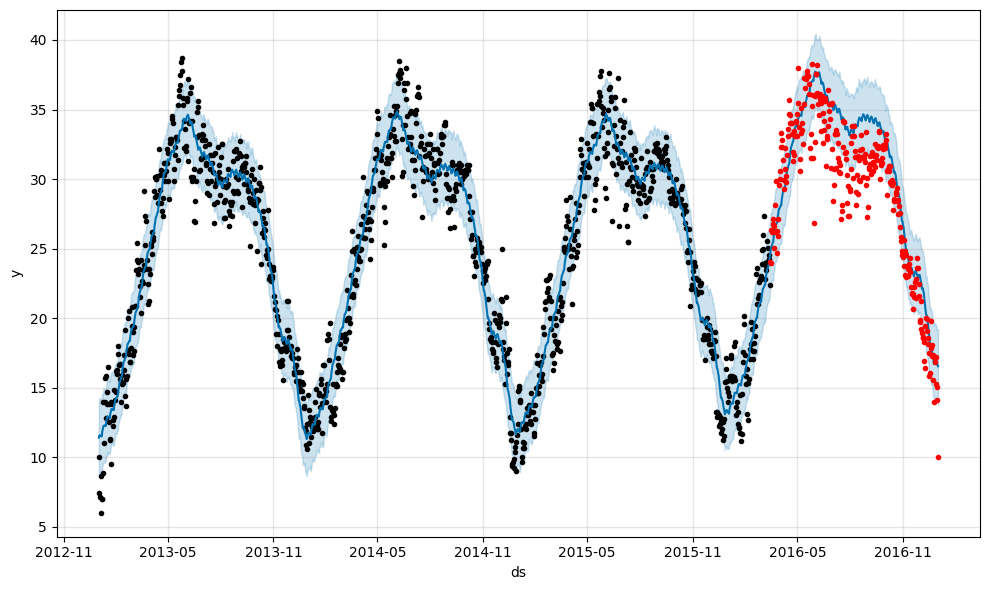

In [ ]:
fig2 = model.plot(predictData)
plt.plot(dfTest['ds'], dfTest['y'], '.r')

In [ ]:
dfTest.columns

Index(['ds', 'y'], dtype='object')

### Now, let´s compare the real datas, with the predicted value.

> ### The predicted datas are indicated by `yhat`, and the real datas, `y`.

> ### Calculate the `rmse`, to verify `how accurate` was the prediction.

In [ ]:
dfPredict = predictData[['ds', 'yhat']]

In [ ]:
dfCompare = pd.merge(dfPredict, dfTest, on='ds')
dfCompare

,ds,yhat,y
0,2016-03-15,24.668055,24.066667
1,2016-03-16,25.008319,23.937500
2,2016-03-17,25.110585,26.312500
3,2016-03-18,25.246076,26.187500
4,2016-03-19,25.408413,26.785714
...,...,...,...
288,2016-12-28,16.917533,17.217391
289,2016-12-29,16.772224,15.238095
290,2016-12-30,16.686033,14.095238
291,2016-12-31,16.651625,15.052632


In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(dfCompare['yhat'], dfCompare['y'])
rmse = np.sqrt(mse)

print(f'RMSE: {rmse:.3f}')

RMSE: 2.709


### Finally, let´s remove the outliers to improving the prediction.

> ### I´ll continue split train and test datas as 20% and 80% for each one.

> ### The prediction will be given by `293 days`.

In [ ]:
model = Prophet()

model.fit(dfProphet)

periodForecast = model.make_future_dataframe(periods=0)
predictReference = model.predict(periodForecast)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8gyuwibi/kty30bdy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8gyuwibi/qgggsue1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76438', 'data', 'file=/tmp/tmp8gyuwibi/kty30bdy.json', 'init=/tmp/tmp8gyuwibi/qgggsue1.json', 'output', 'file=/tmp/tmp8gyuwibi/prophet_modelt9axye0t/prophet_model-20251125114325.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:43:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:43:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
removingOutliers = dfProphet[(dfProphet['y'] > predictReference['yhat_lower']) & (dfProphet['y'] < predictReference['yhat_upper'])]
removingOutliers.shape

(1182, 2)

In [ ]:
dfTrain = pd.DataFrame()
dfTest = pd.DataFrame()

dfTrain['y'] = removingOutliers['y'][:944]
dfTrain['ds'] = removingOutliers['ds'][:944]

dfTest['y'] = removingOutliers['y'][944:]
dfTest['ds'] = removingOutliers['ds'][944:]

In [ ]:
modelWO = Prophet()

modelWO.fit(dfTrain)

future = modelWO.make_future_dataframe(periods=293, freq='D')
forecasting = modelWO.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8gyuwibi/vy9vsn9a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8gyuwibi/wjs247l5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51077', 'data', 'file=/tmp/tmp8gyuwibi/vy9vsn9a.json', 'init=/tmp/tmp8gyuwibi/wjs247l5.json', 'output', 'file=/tmp/tmp8gyuwibi/prophet_model_sawnnyu/prophet_model-20251125114325.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:43:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:43:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


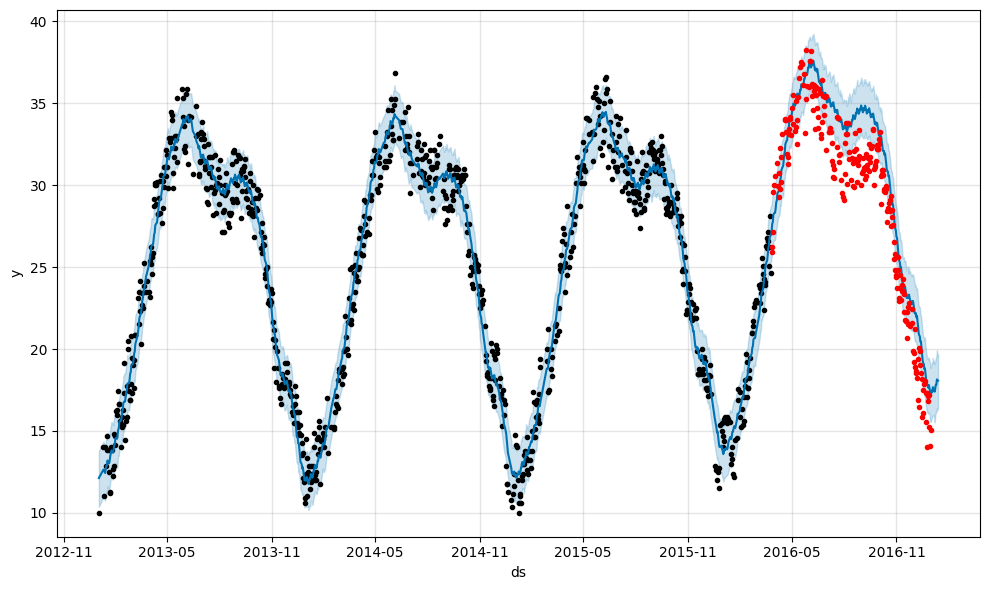

In [ ]:
fig3 = modelWO.plot(forecasting)
plt.plot(dfTest['ds'], dfTest['y'], '.r')

In [ ]:
predictWO = forecasting[['ds','yhat']]
merginWO = pd.merge(predictWO, dfTest, on ='ds')
merginWO

,ds,yhat,y
0,2016-03-27,27.269183,26.250000
1,2016-03-28,27.653374,25.933333
2,2016-03-29,27.757840,27.125000
3,2016-03-30,28.200903,29.571429
4,2016-03-31,28.267907,30.000000
...,...,...,...
233,2016-12-27,17.634805,16.850000
234,2016-12-28,17.797524,17.217391
235,2016-12-29,17.606485,15.238095
236,2016-12-30,17.418264,14.095238


In [ ]:
mseWO = mean_squared_error(merginWO['y'], merginWO['yhat'])
rmseWO = np.sqrt(mseWO)

print(f'Erro médio quadrático sem outliers: {rmseWO:.4f}\n\nErro médio quadrático com outliers: {rmse:.4f}')

Erro médio quadrático sem outliers: 2.2389

Erro médio quadrático com outliers: 2.7089
